In [1]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# load dataset
df = pd.read_csv("C:/Users/PC/Desktop/PC_backup/Data Science/archive/IRIS.csv")

In [3]:
#Lets take a look at the dataset
print(df)
print(df.info())

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (to

In [4]:
#check for any missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

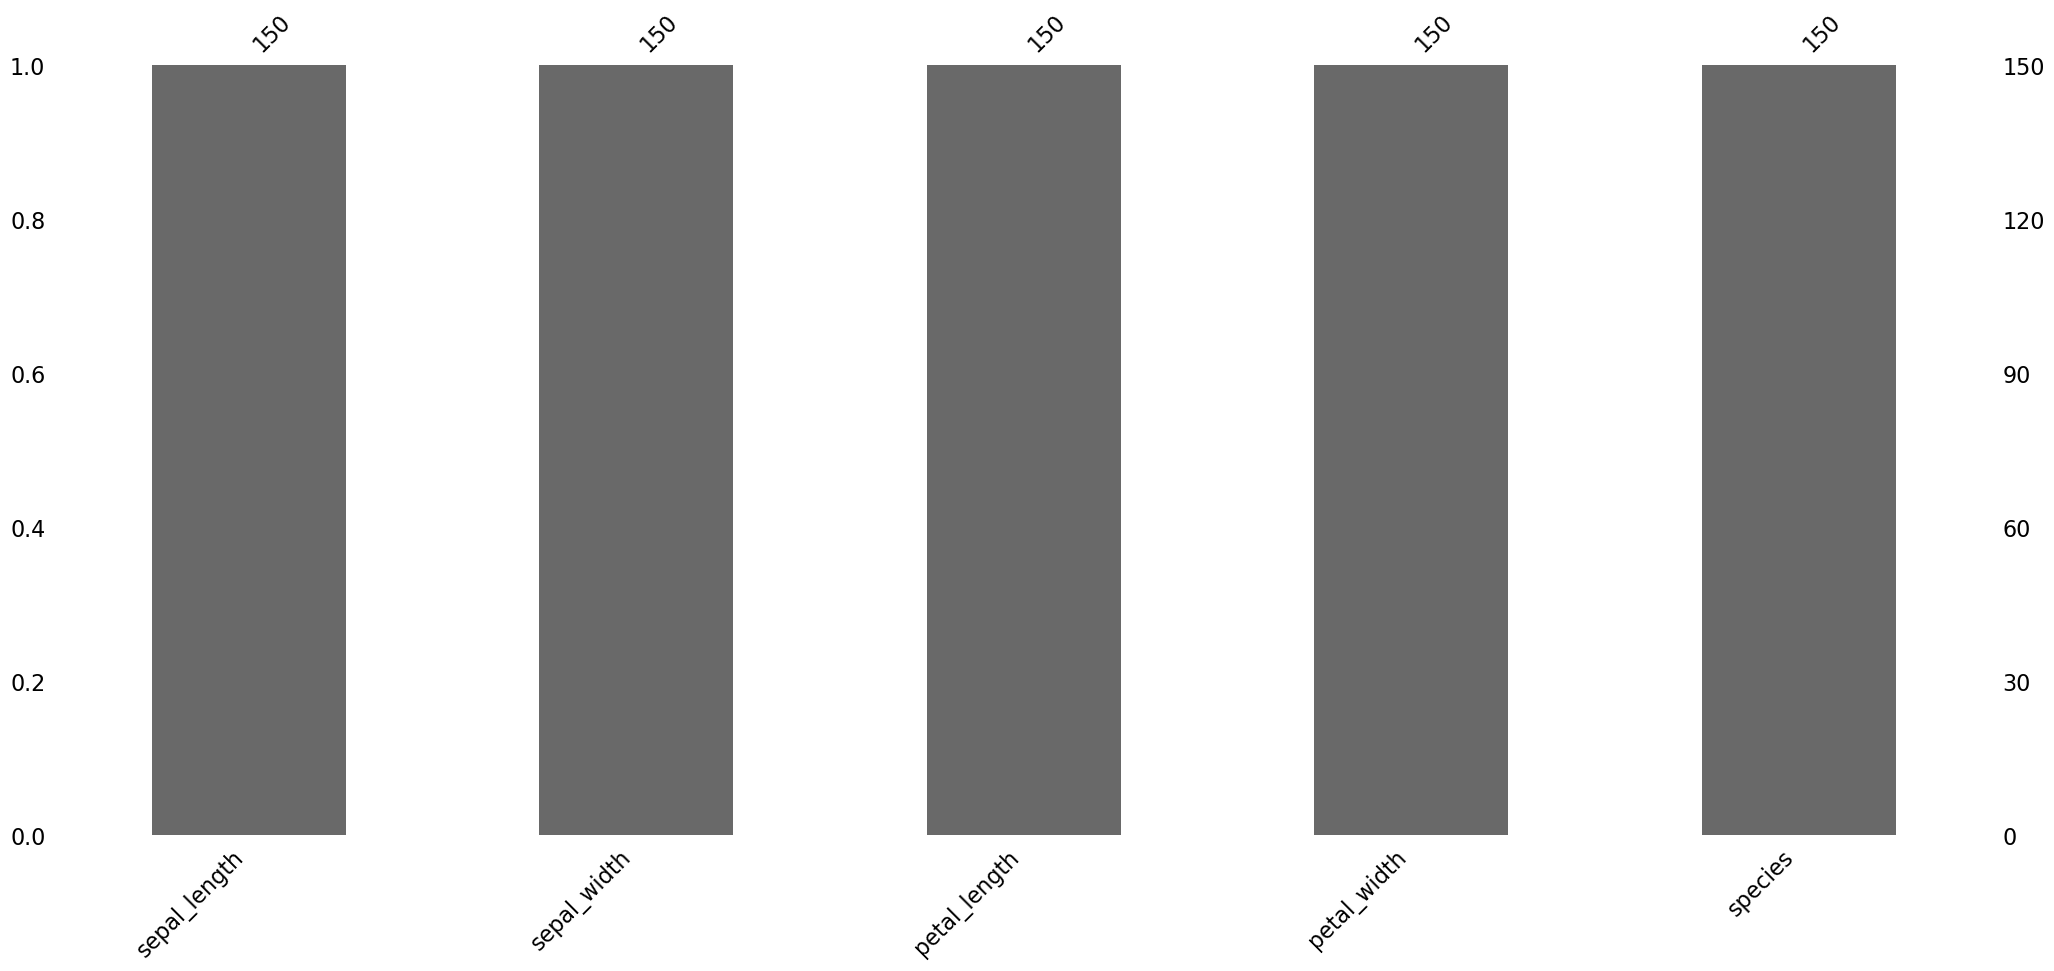

In [5]:
import missingno as msno
msno.bar(df)
plt.show()

In [6]:
#Check and drop duplicates
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

3


## Exploratory Data Analysis

In [7]:
# Descriptive Analysis
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


 Species

In [8]:
species_count = df["species"].value_counts().reset_index()
species_count

,species,count
0,Iris-versicolor,50
1,Iris-virginica,49
2,Iris-setosa,48


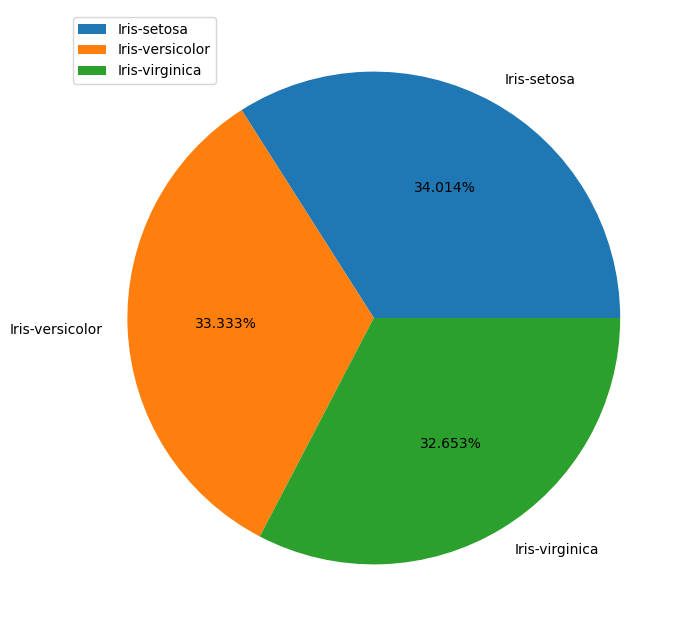

In [9]:
# visualize
plt.figure(figsize=(8,8))
plt.pie(species_count['count'],labels=['Iris-setosa','Iris-versicolor','Iris-virginica'],autopct='%1.3f%%',explode=[0,0,0])
plt.legend(loc='upper left')
plt.show()

Sepals

In [ ]:
# visualize sepals size distribution
sns.lmplot(
    x="sepal_length",
    y="sepal_width",
    hue="species",
    palette="bright",
    data=df
)

plt.title("Sepal Length VS Sepal Width")
plt.show()

Petals

In [ ]:
# visualize petals size distribution
sns.lmplot(
    x="petal_length",
    y="petal_width",
    hue="species",
    palette="bright",
    data=df
)

plt.title("Petal Length VS Petal Width")
plt.show()

In [ ]:
# Visualize for correlation
dfcorr = df.drop(columns = 'species', axis=1)
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(dfcorr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing

In [ ]:
# enconding categorical cilumn
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

In [ ]:
# split target and feature columns
X = df.drop(columns='species')
y = df['species']

In [ ]:
#split train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=43)

## Training and Testing models

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Logistic Regression

In [ ]:
#import and train
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)

# Evaluate
lg.score(X_train, y_train)

In [ ]:
#Evaluate on test data
lg_acc = lg.score(X_test,y_test) 
lg

K_Neighbors

In [ ]:
#import and train
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

#Evaluate
knn.score(X_train,y_train)


In [ ]:
#Evaluate on test data
knn_acc = knn.score(X_test, y_test)
knn_acc

Ada Classifier

In [ ]:
#import and train
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
ada.fit(X_train, y_train)

#Evaluate
ada.score(X_train, y_train)


In [ ]:
#Evaluate on test data
ada_acc = ada.score(X_test,y_test)
ada_acc


# Evaluation and comparision of all the models

In [ ]:
models = pd.DataFrame({
    'Model': ['logisticRegression', 'K_Neighbors', 'Ada boost',],
    'Accuracy Score': [lg_acc *100,knn_acc *100,ada_acc*100,]})
models.sort_values(by='Accuracy Score', ascending=False)